## Part 1: Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
# load data, data taken from https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
full_data = pd.read_csv('dataset.csv')
full_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
# parameters names and types
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
# search for nul values
full_data.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
# search for duplicates
full_data.drop(columns = ['Unnamed: 0'],axis = 1, inplace=True)
full_data.duplicated().sum()

450

We have plenty of entries, removing all duplicate and null entries is okay.

In [6]:
# remove duplicates and null rows
full_data.dropna(inplace=True)
full_data.drop_duplicates(inplace=True)

In [7]:
# removing unwanted columns
full_data.drop(columns=['track_id','artists','album_name','track_name'], inplace=True)
full_data.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [8]:
# types of genres
full_data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [9]:
# encode 'explicit' and 'track genre' columns
from sklearn.preprocessing import LabelEncoder
full_data['explicit'] = LabelEncoder().fit_transform(full_data['explicit'])
full_data['track_genre'] = LabelEncoder().fit_transform(full_data['track_genre'])
full_data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


In [10]:
from sklearn.model_selection import train_test_split
# divide label from data
X = full_data.drop(columns = ['track_genre'])
y = full_data.loc[:,'track_genre']
# one-hot encode y
from sklearn.preprocessing import OneHotEncoder
y = np.array(y).reshape(-1, 1)
y = OneHotEncoder(sparse = False).fit_transform(y)

X.shape

(113549, 15)

In [11]:
# preparing the features for RNN
# The LSTM layer requires a specific shape, we will transform X accordingly 
X = np.expand_dims(X, 2)

X.shape

(113549, 15, 1)

In [12]:

# train test split with shuffle
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# split validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
X_val.shape

(18168, 15, 1)

In [14]:
# scaling the data to fit between [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# treat train set as all the knowledge we have and transform validation and test according to it
scaler.fit(X_train[:,:,0])
X_train[:,:,0] = scaler.transform(X_train[:,:,0])
X_val[:,:,0] = scaler.transform(X_val[:,:,0])
X_test[:,:,0] = scaler.transform(X_test[:,:,0])
X_train.max() # new maximal value

1.0

Data is now ready for learning

## Part 2: RNN
In the previous project we used Softmax and MLP to try and learn the data.
We managed to do so to a certain success, with 0.26 being the highest accuracy we managed to accomplish.

This time we will use more advanced models, such as RNN (Recursive Neural Network)

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(2)

### 1 LSTM layer

In [16]:
model = keras.Sequential()
# first layer is dense layer
model.add(layers.Dense(250, input_shape=(15,1,)))
# second layer is the LSTM recursive layer
model.add(layers.LSTM(80, return_sequences = False))
# last layer is the softmax layer for classification
model.add(layers.Dense(114, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15, 250)           500       
_________________________________________________________________
lstm (LSTM)                  (None, 80)                105920    
_________________________________________________________________
dense_1 (Dense)              (None, 114)               9234      
Total params: 115,654
Trainable params: 115,654
Non-trainable params: 0
_________________________________________________________________


In [17]:
checkpoint_path = "rnn1_training/cp.ckpt"


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [18]:
# Compile and train the model.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train,
                  y_train,
                  epochs=1000, 
                  batch_size=10000, 
                  validation_data=(X_val, y_val),
                  callbacks=[cp_callback])  # Pass callback to training

Epoch 1/1000
8/8 [==============================] - 40s 4s/step - loss: 4.7363 - accuracy: 0.0091 - val_loss: 4.7357 - val_accuracy: 0.0092

Epoch 00001: saving model to rnn1_training\cp.ckpt
Epoch 2/1000
8/8 [==============================] - 28s 4s/step - loss: 4.7345 - accuracy: 0.0096 - val_loss: 4.7338 - val_accuracy: 0.0144

Epoch 00002: saving model to rnn1_training\cp.ckpt
Epoch 3/1000
8/8 [==============================] - 23s 3s/step - loss: 4.7316 - accuracy: 0.0106 - val_loss: 4.7287 - val_accuracy: 0.0089

Epoch 00003: saving model to rnn1_training\cp.ckpt
Epoch 4/1000
8/8 [==============================] - 23s 3s/step - loss: 4.7213 - accuracy: 0.0112 - val_loss: 4.7057 - val_accuracy: 0.0137

Epoch 00004: saving model to rnn1_training\cp.ckpt
Epoch 5/1000
8/8 [==============================] - 22s 3s/step - loss: 4.6793 - accuracy: 0.0161 - val_loss: 4.6350 - val_accuracy: 0.0244

Epoch 00005: saving model to rnn1_training\cp.ckpt
Epoch 6/1000
8/8 [======================


Epoch 00043: saving model to rnn1_training\cp.ckpt
Epoch 44/1000
8/8 [==============================] - 22s 3s/step - loss: 3.3526 - accuracy: 0.1741 - val_loss: 3.3504 - val_accuracy: 0.1751

Epoch 00044: saving model to rnn1_training\cp.ckpt
Epoch 45/1000
8/8 [==============================] - 22s 3s/step - loss: 3.3368 - accuracy: 0.1760 - val_loss: 3.3502 - val_accuracy: 0.1738

Epoch 00045: saving model to rnn1_training\cp.ckpt
Epoch 46/1000
8/8 [==============================] - 22s 3s/step - loss: 3.3300 - accuracy: 0.1780 - val_loss: 3.3412 - val_accuracy: 0.1763

Epoch 00046: saving model to rnn1_training\cp.ckpt
Epoch 47/1000
8/8 [==============================] - 22s 3s/step - loss: 3.3186 - accuracy: 0.1797 - val_loss: 3.3511 - val_accuracy: 0.1746

Epoch 00047: saving model to rnn1_training\cp.ckpt
Epoch 48/1000
8/8 [==============================] - 22s 3s/step - loss: 3.3172 - accuracy: 0.1789 - val_loss: 3.3238 - val_accuracy: 0.1814

Epoch 00048: saving model to rnn1_

8/8 [==============================] - 22s 3s/step - loss: 3.0887 - accuracy: 0.2172 - val_loss: 3.1113 - val_accuracy: 0.2141

Epoch 00086: saving model to rnn1_training\cp.ckpt
Epoch 87/1000
8/8 [==============================] - 22s 3s/step - loss: 3.0811 - accuracy: 0.2188 - val_loss: 3.1108 - val_accuracy: 0.2183

Epoch 00087: saving model to rnn1_training\cp.ckpt
Epoch 88/1000
8/8 [==============================] - 22s 3s/step - loss: 3.0775 - accuracy: 0.2205 - val_loss: 3.1009 - val_accuracy: 0.2206

Epoch 00088: saving model to rnn1_training\cp.ckpt
Epoch 89/1000
8/8 [==============================] - 22s 3s/step - loss: 3.0700 - accuracy: 0.2206 - val_loss: 3.0975 - val_accuracy: 0.2175

Epoch 00089: saving model to rnn1_training\cp.ckpt
Epoch 90/1000
8/8 [==============================] - 22s 3s/step - loss: 3.0798 - accuracy: 0.2180 - val_loss: 3.0961 - val_accuracy: 0.2187

Epoch 00090: saving model to rnn1_training\cp.ckpt
Epoch 91/1000
8/8 [==============================

8/8 [==============================] - 22s 3s/step - loss: 2.9645 - accuracy: 0.2375 - val_loss: 3.0062 - val_accuracy: 0.2284

Epoch 00128: saving model to rnn1_training\cp.ckpt
Epoch 129/1000
8/8 [==============================] - 22s 3s/step - loss: 2.9594 - accuracy: 0.2366 - val_loss: 3.0055 - val_accuracy: 0.2339

Epoch 00129: saving model to rnn1_training\cp.ckpt
Epoch 130/1000
8/8 [==============================] - 21s 3s/step - loss: 2.9615 - accuracy: 0.2367 - val_loss: 3.0061 - val_accuracy: 0.2330

Epoch 00130: saving model to rnn1_training\cp.ckpt
Epoch 131/1000
8/8 [==============================] - 22s 3s/step - loss: 2.9570 - accuracy: 0.2372 - val_loss: 3.0018 - val_accuracy: 0.2308

Epoch 00131: saving model to rnn1_training\cp.ckpt
Epoch 132/1000
8/8 [==============================] - 22s 3s/step - loss: 2.9569 - accuracy: 0.2374 - val_loss: 3.0037 - val_accuracy: 0.2321

Epoch 00132: saving model to rnn1_training\cp.ckpt
Epoch 133/1000
8/8 [=========================

8/8 [==============================] - 22s 3s/step - loss: 2.8941 - accuracy: 0.2483 - val_loss: 2.9478 - val_accuracy: 0.2409

Epoch 00170: saving model to rnn1_training\cp.ckpt
Epoch 171/1000
8/8 [==============================] - 22s 3s/step - loss: 2.8884 - accuracy: 0.2503 - val_loss: 2.9400 - val_accuracy: 0.2437

Epoch 00171: saving model to rnn1_training\cp.ckpt
Epoch 172/1000
8/8 [==============================] - 22s 3s/step - loss: 2.8838 - accuracy: 0.2505 - val_loss: 2.9351 - val_accuracy: 0.2453

Epoch 00172: saving model to rnn1_training\cp.ckpt
Epoch 173/1000
8/8 [==============================] - 22s 3s/step - loss: 2.8843 - accuracy: 0.2507 - val_loss: 2.9377 - val_accuracy: 0.2452

Epoch 00173: saving model to rnn1_training\cp.ckpt
Epoch 174/1000
8/8 [==============================] - 22s 3s/step - loss: 2.8852 - accuracy: 0.2505 - val_loss: 2.9408 - val_accuracy: 0.2436

Epoch 00174: saving model to rnn1_training\cp.ckpt
Epoch 175/1000
8/8 [=========================

8/8 [==============================] - 22s 3s/step - loss: 2.8356 - accuracy: 0.2611 - val_loss: 2.8970 - val_accuracy: 0.2552

Epoch 00212: saving model to rnn1_training\cp.ckpt
Epoch 213/1000
8/8 [==============================] - 22s 3s/step - loss: 2.8374 - accuracy: 0.2584 - val_loss: 2.8962 - val_accuracy: 0.2523

Epoch 00213: saving model to rnn1_training\cp.ckpt
Epoch 214/1000
8/8 [==============================] - 22s 3s/step - loss: 2.8349 - accuracy: 0.2612 - val_loss: 2.8917 - val_accuracy: 0.2539

Epoch 00214: saving model to rnn1_training\cp.ckpt
Epoch 215/1000
8/8 [==============================] - 22s 3s/step - loss: 2.8307 - accuracy: 0.2612 - val_loss: 2.8861 - val_accuracy: 0.2557

Epoch 00215: saving model to rnn1_training\cp.ckpt
Epoch 216/1000
8/8 [==============================] - 22s 3s/step - loss: 2.8278 - accuracy: 0.2616 - val_loss: 2.8825 - val_accuracy: 0.2572

Epoch 00216: saving model to rnn1_training\cp.ckpt
Epoch 217/1000
8/8 [=========================

8/8 [==============================] - 22s 3s/step - loss: 2.7885 - accuracy: 0.2710 - val_loss: 2.8565 - val_accuracy: 0.2618

Epoch 00254: saving model to rnn1_training\cp.ckpt
Epoch 255/1000
8/8 [==============================] - 21s 3s/step - loss: 2.7883 - accuracy: 0.2703 - val_loss: 2.8491 - val_accuracy: 0.2635

Epoch 00255: saving model to rnn1_training\cp.ckpt
Epoch 256/1000
8/8 [==============================] - 21s 3s/step - loss: 2.7853 - accuracy: 0.2713 - val_loss: 2.8529 - val_accuracy: 0.2627

Epoch 00256: saving model to rnn1_training\cp.ckpt
Epoch 257/1000
8/8 [==============================] - 22s 3s/step - loss: 2.7836 - accuracy: 0.2717 - val_loss: 2.8435 - val_accuracy: 0.2642

Epoch 00257: saving model to rnn1_training\cp.ckpt
Epoch 258/1000
8/8 [==============================] - 22s 3s/step - loss: 2.7799 - accuracy: 0.2725 - val_loss: 2.8425 - val_accuracy: 0.2647

Epoch 00258: saving model to rnn1_training\cp.ckpt
Epoch 259/1000
8/8 [=========================

8/8 [==============================] - 23s 3s/step - loss: 2.7432 - accuracy: 0.2800 - val_loss: 2.8092 - val_accuracy: 0.2709

Epoch 00296: saving model to rnn1_training\cp.ckpt
Epoch 297/1000
8/8 [==============================] - 22s 3s/step - loss: 2.7410 - accuracy: 0.2803 - val_loss: 2.8077 - val_accuracy: 0.2709

Epoch 00297: saving model to rnn1_training\cp.ckpt
Epoch 298/1000
8/8 [==============================] - 22s 3s/step - loss: 2.7414 - accuracy: 0.2797 - val_loss: 2.8095 - val_accuracy: 0.2722

Epoch 00298: saving model to rnn1_training\cp.ckpt
Epoch 299/1000
8/8 [==============================] - 22s 3s/step - loss: 2.7399 - accuracy: 0.2821 - val_loss: 2.8094 - val_accuracy: 0.2716

Epoch 00299: saving model to rnn1_training\cp.ckpt
Epoch 300/1000
8/8 [==============================] - 22s 3s/step - loss: 2.7364 - accuracy: 0.2817 - val_loss: 2.8231 - val_accuracy: 0.2677

Epoch 00300: saving model to rnn1_training\cp.ckpt
Epoch 301/1000
8/8 [=========================

8/8 [==============================] - 22s 3s/step - loss: 2.7138 - accuracy: 0.2866 - val_loss: 2.8033 - val_accuracy: 0.2728

Epoch 00338: saving model to rnn1_training\cp.ckpt
Epoch 339/1000
8/8 [==============================] - 22s 3s/step - loss: 2.7129 - accuracy: 0.2857 - val_loss: 2.7941 - val_accuracy: 0.2693

Epoch 00339: saving model to rnn1_training\cp.ckpt
Epoch 340/1000
8/8 [==============================] - 23s 3s/step - loss: 2.7145 - accuracy: 0.2841 - val_loss: 2.7879 - val_accuracy: 0.2754

Epoch 00340: saving model to rnn1_training\cp.ckpt
Epoch 341/1000
8/8 [==============================] - 22s 3s/step - loss: 2.7063 - accuracy: 0.2873 - val_loss: 2.7744 - val_accuracy: 0.2779

Epoch 00341: saving model to rnn1_training\cp.ckpt
Epoch 342/1000
8/8 [==============================] - 22s 3s/step - loss: 2.7044 - accuracy: 0.2874 - val_loss: 2.7798 - val_accuracy: 0.2759

Epoch 00342: saving model to rnn1_training\cp.ckpt
Epoch 343/1000
8/8 [=========================

8/8 [==============================] - 23s 3s/step - loss: 2.6787 - accuracy: 0.2925 - val_loss: 2.7584 - val_accuracy: 0.2768

Epoch 00380: saving model to rnn1_training\cp.ckpt
Epoch 381/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6779 - accuracy: 0.2928 - val_loss: 2.7587 - val_accuracy: 0.2799

Epoch 00381: saving model to rnn1_training\cp.ckpt
Epoch 382/1000
8/8 [==============================] - 23s 3s/step - loss: 2.6801 - accuracy: 0.2925 - val_loss: 2.7742 - val_accuracy: 0.2757

Epoch 00382: saving model to rnn1_training\cp.ckpt
Epoch 383/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6854 - accuracy: 0.2912 - val_loss: 2.7606 - val_accuracy: 0.2807

Epoch 00383: saving model to rnn1_training\cp.ckpt
Epoch 384/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6731 - accuracy: 0.2939 - val_loss: 2.7518 - val_accuracy: 0.2827

Epoch 00384: saving model to rnn1_training\cp.ckpt
Epoch 385/1000
8/8 [=========================

8/8 [==============================] - 22s 3s/step - loss: 2.6499 - accuracy: 0.2984 - val_loss: 2.7316 - val_accuracy: 0.2856

Epoch 00422: saving model to rnn1_training\cp.ckpt
Epoch 423/1000
8/8 [==============================] - 23s 3s/step - loss: 2.6437 - accuracy: 0.2990 - val_loss: 2.7317 - val_accuracy: 0.2840

Epoch 00423: saving model to rnn1_training\cp.ckpt
Epoch 424/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6449 - accuracy: 0.2987 - val_loss: 2.7324 - val_accuracy: 0.2843

Epoch 00424: saving model to rnn1_training\cp.ckpt
Epoch 425/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6460 - accuracy: 0.2992 - val_loss: 2.7362 - val_accuracy: 0.2838

Epoch 00425: saving model to rnn1_training\cp.ckpt
Epoch 426/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6479 - accuracy: 0.2978 - val_loss: 2.7371 - val_accuracy: 0.2844

Epoch 00426: saving model to rnn1_training\cp.ckpt
Epoch 427/1000
8/8 [=========================

8/8 [==============================] - 23s 3s/step - loss: 2.6224 - accuracy: 0.3019 - val_loss: 2.7181 - val_accuracy: 0.2853

Epoch 00464: saving model to rnn1_training\cp.ckpt
Epoch 465/1000
8/8 [==============================] - 23s 3s/step - loss: 2.6277 - accuracy: 0.3028 - val_loss: 2.7355 - val_accuracy: 0.2843

Epoch 00465: saving model to rnn1_training\cp.ckpt
Epoch 466/1000
8/8 [==============================] - 23s 3s/step - loss: 2.6291 - accuracy: 0.3007 - val_loss: 2.7156 - val_accuracy: 0.2864

Epoch 00466: saving model to rnn1_training\cp.ckpt
Epoch 467/1000
8/8 [==============================] - 23s 3s/step - loss: 2.6222 - accuracy: 0.3030 - val_loss: 2.7215 - val_accuracy: 0.2859

Epoch 00467: saving model to rnn1_training\cp.ckpt
Epoch 468/1000
8/8 [==============================] - 23s 3s/step - loss: 2.6256 - accuracy: 0.3025 - val_loss: 2.7171 - val_accuracy: 0.2867

Epoch 00468: saving model to rnn1_training\cp.ckpt
Epoch 469/1000
8/8 [=========================

8/8 [==============================] - 22s 3s/step - loss: 2.6108 - accuracy: 0.3063 - val_loss: 2.7259 - val_accuracy: 0.2858

Epoch 00506: saving model to rnn1_training\cp.ckpt
Epoch 507/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6108 - accuracy: 0.3051 - val_loss: 2.7015 - val_accuracy: 0.2897

Epoch 00507: saving model to rnn1_training\cp.ckpt
Epoch 508/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6063 - accuracy: 0.3069 - val_loss: 2.7110 - val_accuracy: 0.2883

Epoch 00508: saving model to rnn1_training\cp.ckpt
Epoch 509/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6049 - accuracy: 0.3057 - val_loss: 2.7057 - val_accuracy: 0.2891

Epoch 00509: saving model to rnn1_training\cp.ckpt
Epoch 510/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6027 - accuracy: 0.3069 - val_loss: 2.7026 - val_accuracy: 0.2896

Epoch 00510: saving model to rnn1_training\cp.ckpt
Epoch 511/1000
8/8 [=========================

8/8 [==============================] - 12s 1s/step - loss: 2.5846 - accuracy: 0.3098 - val_loss: 2.6902 - val_accuracy: 0.2929

Epoch 00548: saving model to rnn1_training\cp.ckpt
Epoch 549/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5892 - accuracy: 0.3087 - val_loss: 2.6984 - val_accuracy: 0.2912

Epoch 00549: saving model to rnn1_training\cp.ckpt
Epoch 550/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5888 - accuracy: 0.3096 - val_loss: 2.7049 - val_accuracy: 0.2874

Epoch 00550: saving model to rnn1_training\cp.ckpt
Epoch 551/1000
8/8 [==============================] - 12s 2s/step - loss: 2.5923 - accuracy: 0.3090 - val_loss: 2.7299 - val_accuracy: 0.2852

Epoch 00551: saving model to rnn1_training\cp.ckpt
Epoch 552/1000
8/8 [==============================] - 13s 2s/step - loss: 2.6062 - accuracy: 0.3053 - val_loss: 2.6984 - val_accuracy: 0.2905

Epoch 00552: saving model to rnn1_training\cp.ckpt
Epoch 553/1000
8/8 [=========================

8/8 [==============================] - 12s 1s/step - loss: 2.5724 - accuracy: 0.3128 - val_loss: 2.6828 - val_accuracy: 0.2935

Epoch 00590: saving model to rnn1_training\cp.ckpt
Epoch 591/1000
8/8 [==============================] - 12s 1s/step - loss: 2.5752 - accuracy: 0.3126 - val_loss: 2.7064 - val_accuracy: 0.2892

Epoch 00591: saving model to rnn1_training\cp.ckpt
Epoch 592/1000
8/8 [==============================] - 12s 1s/step - loss: 2.5765 - accuracy: 0.3110 - val_loss: 2.6828 - val_accuracy: 0.2933

Epoch 00592: saving model to rnn1_training\cp.ckpt
Epoch 593/1000
8/8 [==============================] - 12s 1s/step - loss: 2.5716 - accuracy: 0.3130 - val_loss: 2.6839 - val_accuracy: 0.2947

Epoch 00593: saving model to rnn1_training\cp.ckpt
Epoch 594/1000
8/8 [==============================] - 12s 1s/step - loss: 2.5755 - accuracy: 0.3111 - val_loss: 2.6881 - val_accuracy: 0.2886

Epoch 00594: saving model to rnn1_training\cp.ckpt
Epoch 595/1000
8/8 [=========================

8/8 [==============================] - 15s 2s/step - loss: 2.5606 - accuracy: 0.3148 - val_loss: 2.6719 - val_accuracy: 0.2977

Epoch 00632: saving model to rnn1_training\cp.ckpt
Epoch 633/1000
8/8 [==============================] - 15s 2s/step - loss: 2.5558 - accuracy: 0.3162 - val_loss: 2.6864 - val_accuracy: 0.2926

Epoch 00633: saving model to rnn1_training\cp.ckpt
Epoch 634/1000
8/8 [==============================] - 16s 2s/step - loss: 2.5648 - accuracy: 0.3127 - val_loss: 2.6815 - val_accuracy: 0.2913

Epoch 00634: saving model to rnn1_training\cp.ckpt
Epoch 635/1000
8/8 [==============================] - 16s 2s/step - loss: 2.5577 - accuracy: 0.3147 - val_loss: 2.6800 - val_accuracy: 0.2951

Epoch 00635: saving model to rnn1_training\cp.ckpt
Epoch 636/1000
8/8 [==============================] - 15s 2s/step - loss: 2.5522 - accuracy: 0.3171 - val_loss: 2.6718 - val_accuracy: 0.2974

Epoch 00636: saving model to rnn1_training\cp.ckpt
Epoch 637/1000
8/8 [=========================

8/8 [==============================] - 14s 2s/step - loss: 2.5456 - accuracy: 0.3173 - val_loss: 2.6608 - val_accuracy: 0.2964

Epoch 00674: saving model to rnn1_training\cp.ckpt
Epoch 675/1000
8/8 [==============================] - 14s 2s/step - loss: 2.5413 - accuracy: 0.3186 - val_loss: 2.6682 - val_accuracy: 0.2955

Epoch 00675: saving model to rnn1_training\cp.ckpt
Epoch 676/1000
8/8 [==============================] - 14s 2s/step - loss: 2.5397 - accuracy: 0.3184 - val_loss: 2.6758 - val_accuracy: 0.2950

Epoch 00676: saving model to rnn1_training\cp.ckpt
Epoch 677/1000
8/8 [==============================] - 14s 2s/step - loss: 2.5427 - accuracy: 0.3191 - val_loss: 2.6662 - val_accuracy: 0.2984

Epoch 00677: saving model to rnn1_training\cp.ckpt
Epoch 678/1000
8/8 [==============================] - 14s 2s/step - loss: 2.5382 - accuracy: 0.3188 - val_loss: 2.6666 - val_accuracy: 0.2981

Epoch 00678: saving model to rnn1_training\cp.ckpt
Epoch 679/1000
8/8 [=========================

8/8 [==============================] - 12s 2s/step - loss: 2.5257 - accuracy: 0.3212 - val_loss: 2.6651 - val_accuracy: 0.2968

Epoch 00716: saving model to rnn1_training\cp.ckpt
Epoch 717/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5279 - accuracy: 0.3217 - val_loss: 2.6546 - val_accuracy: 0.3018

Epoch 00717: saving model to rnn1_training\cp.ckpt
Epoch 718/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5257 - accuracy: 0.3202 - val_loss: 2.6561 - val_accuracy: 0.2983

Epoch 00718: saving model to rnn1_training\cp.ckpt
Epoch 719/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5221 - accuracy: 0.3235 - val_loss: 2.6608 - val_accuracy: 0.2964

Epoch 00719: saving model to rnn1_training\cp.ckpt
Epoch 720/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5256 - accuracy: 0.3211 - val_loss: 2.6593 - val_accuracy: 0.3026

Epoch 00720: saving model to rnn1_training\cp.ckpt
Epoch 721/1000
8/8 [=========================

8/8 [==============================] - 12s 2s/step - loss: 2.5202 - accuracy: 0.3231 - val_loss: 2.6616 - val_accuracy: 0.2949

Epoch 00758: saving model to rnn1_training\cp.ckpt
Epoch 759/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5178 - accuracy: 0.3226 - val_loss: 2.6489 - val_accuracy: 0.3015

Epoch 00759: saving model to rnn1_training\cp.ckpt
Epoch 760/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5135 - accuracy: 0.3247 - val_loss: 2.6490 - val_accuracy: 0.3023

Epoch 00760: saving model to rnn1_training\cp.ckpt
Epoch 761/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5144 - accuracy: 0.3237 - val_loss: 2.6534 - val_accuracy: 0.3017

Epoch 00761: saving model to rnn1_training\cp.ckpt
Epoch 762/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5132 - accuracy: 0.3247 - val_loss: 2.6559 - val_accuracy: 0.2984

Epoch 00762: saving model to rnn1_training\cp.ckpt
Epoch 763/1000
8/8 [=========================

8/8 [==============================] - 13s 2s/step - loss: 2.5008 - accuracy: 0.3271 - val_loss: 2.6453 - val_accuracy: 0.3026

Epoch 00800: saving model to rnn1_training\cp.ckpt
Epoch 801/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5000 - accuracy: 0.3278 - val_loss: 2.6437 - val_accuracy: 0.3029

Epoch 00801: saving model to rnn1_training\cp.ckpt
Epoch 802/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5012 - accuracy: 0.3270 - val_loss: 2.6423 - val_accuracy: 0.3049

Epoch 00802: saving model to rnn1_training\cp.ckpt
Epoch 803/1000
8/8 [==============================] - 13s 2s/step - loss: 2.5010 - accuracy: 0.3267 - val_loss: 2.6436 - val_accuracy: 0.3015

Epoch 00803: saving model to rnn1_training\cp.ckpt
Epoch 804/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4984 - accuracy: 0.3277 - val_loss: 2.6469 - val_accuracy: 0.3048

Epoch 00804: saving model to rnn1_training\cp.ckpt
Epoch 805/1000
8/8 [=========================

8/8 [==============================] - 13s 2s/step - loss: 2.4910 - accuracy: 0.3300 - val_loss: 2.6478 - val_accuracy: 0.3020

Epoch 00842: saving model to rnn1_training\cp.ckpt
Epoch 843/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4996 - accuracy: 0.3282 - val_loss: 2.6387 - val_accuracy: 0.3035

Epoch 00843: saving model to rnn1_training\cp.ckpt
Epoch 844/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4891 - accuracy: 0.3291 - val_loss: 2.6400 - val_accuracy: 0.3027

Epoch 00844: saving model to rnn1_training\cp.ckpt
Epoch 845/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4882 - accuracy: 0.3305 - val_loss: 2.6451 - val_accuracy: 0.3016

Epoch 00845: saving model to rnn1_training\cp.ckpt
Epoch 846/1000
8/8 [==============================] - 12s 2s/step - loss: 2.4909 - accuracy: 0.3305 - val_loss: 2.6424 - val_accuracy: 0.3027

Epoch 00846: saving model to rnn1_training\cp.ckpt
Epoch 847/1000
8/8 [=========================

8/8 [==============================] - 13s 2s/step - loss: 2.4877 - accuracy: 0.3302 - val_loss: 2.6537 - val_accuracy: 0.2993

Epoch 00884: saving model to rnn1_training\cp.ckpt
Epoch 885/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4914 - accuracy: 0.3287 - val_loss: 2.6383 - val_accuracy: 0.3024

Epoch 00885: saving model to rnn1_training\cp.ckpt
Epoch 886/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4833 - accuracy: 0.3323 - val_loss: 2.6410 - val_accuracy: 0.3040

Epoch 00886: saving model to rnn1_training\cp.ckpt
Epoch 887/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4798 - accuracy: 0.3315 - val_loss: 2.6390 - val_accuracy: 0.3028

Epoch 00887: saving model to rnn1_training\cp.ckpt
Epoch 888/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4801 - accuracy: 0.3320 - val_loss: 2.6364 - val_accuracy: 0.3038

Epoch 00888: saving model to rnn1_training\cp.ckpt
Epoch 889/1000
8/8 [=========================

8/8 [==============================] - 13s 2s/step - loss: 2.4708 - accuracy: 0.3336 - val_loss: 2.6360 - val_accuracy: 0.3053

Epoch 00926: saving model to rnn1_training\cp.ckpt
Epoch 927/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4719 - accuracy: 0.3330 - val_loss: 2.6341 - val_accuracy: 0.3050

Epoch 00927: saving model to rnn1_training\cp.ckpt
Epoch 928/1000
8/8 [==============================] - 14s 2s/step - loss: 2.4694 - accuracy: 0.3343 - val_loss: 2.6438 - val_accuracy: 0.3010

Epoch 00928: saving model to rnn1_training\cp.ckpt
Epoch 929/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4780 - accuracy: 0.3323 - val_loss: 2.6348 - val_accuracy: 0.3035

Epoch 00929: saving model to rnn1_training\cp.ckpt
Epoch 930/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4760 - accuracy: 0.3330 - val_loss: 2.6289 - val_accuracy: 0.3061

Epoch 00930: saving model to rnn1_training\cp.ckpt
Epoch 931/1000
8/8 [=========================

8/8 [==============================] - 13s 2s/step - loss: 2.4604 - accuracy: 0.3360 - val_loss: 2.6263 - val_accuracy: 0.3053

Epoch 00968: saving model to rnn1_training\cp.ckpt
Epoch 969/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4586 - accuracy: 0.3371 - val_loss: 2.6240 - val_accuracy: 0.3065

Epoch 00969: saving model to rnn1_training\cp.ckpt
Epoch 970/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4583 - accuracy: 0.3371 - val_loss: 2.6307 - val_accuracy: 0.3056

Epoch 00970: saving model to rnn1_training\cp.ckpt
Epoch 971/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4636 - accuracy: 0.3363 - val_loss: 2.6289 - val_accuracy: 0.3060

Epoch 00971: saving model to rnn1_training\cp.ckpt
Epoch 972/1000
8/8 [==============================] - 13s 2s/step - loss: 2.4616 - accuracy: 0.3361 - val_loss: 2.6316 - val_accuracy: 0.3063

Epoch 00972: saving model to rnn1_training\cp.ckpt
Epoch 973/1000
8/8 [=========================

plot learning curves

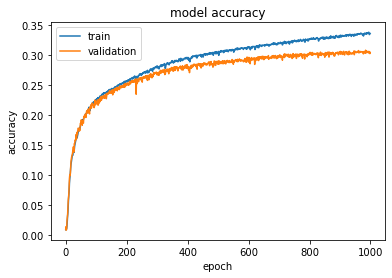

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

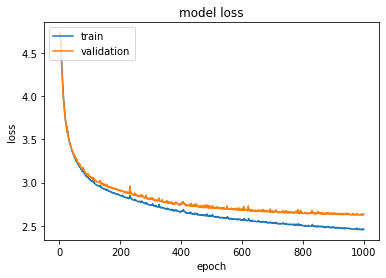

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Test accuracy

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_accuracy)

710/710 [==============================] - 4s 5ms/step - loss: 2.6549 - accuracy: 0.3005
test loss: 2.6549065113067627
test accuracy: 0.3004843592643738


In [22]:
#predictions
y_pred = model.predict(X_test)

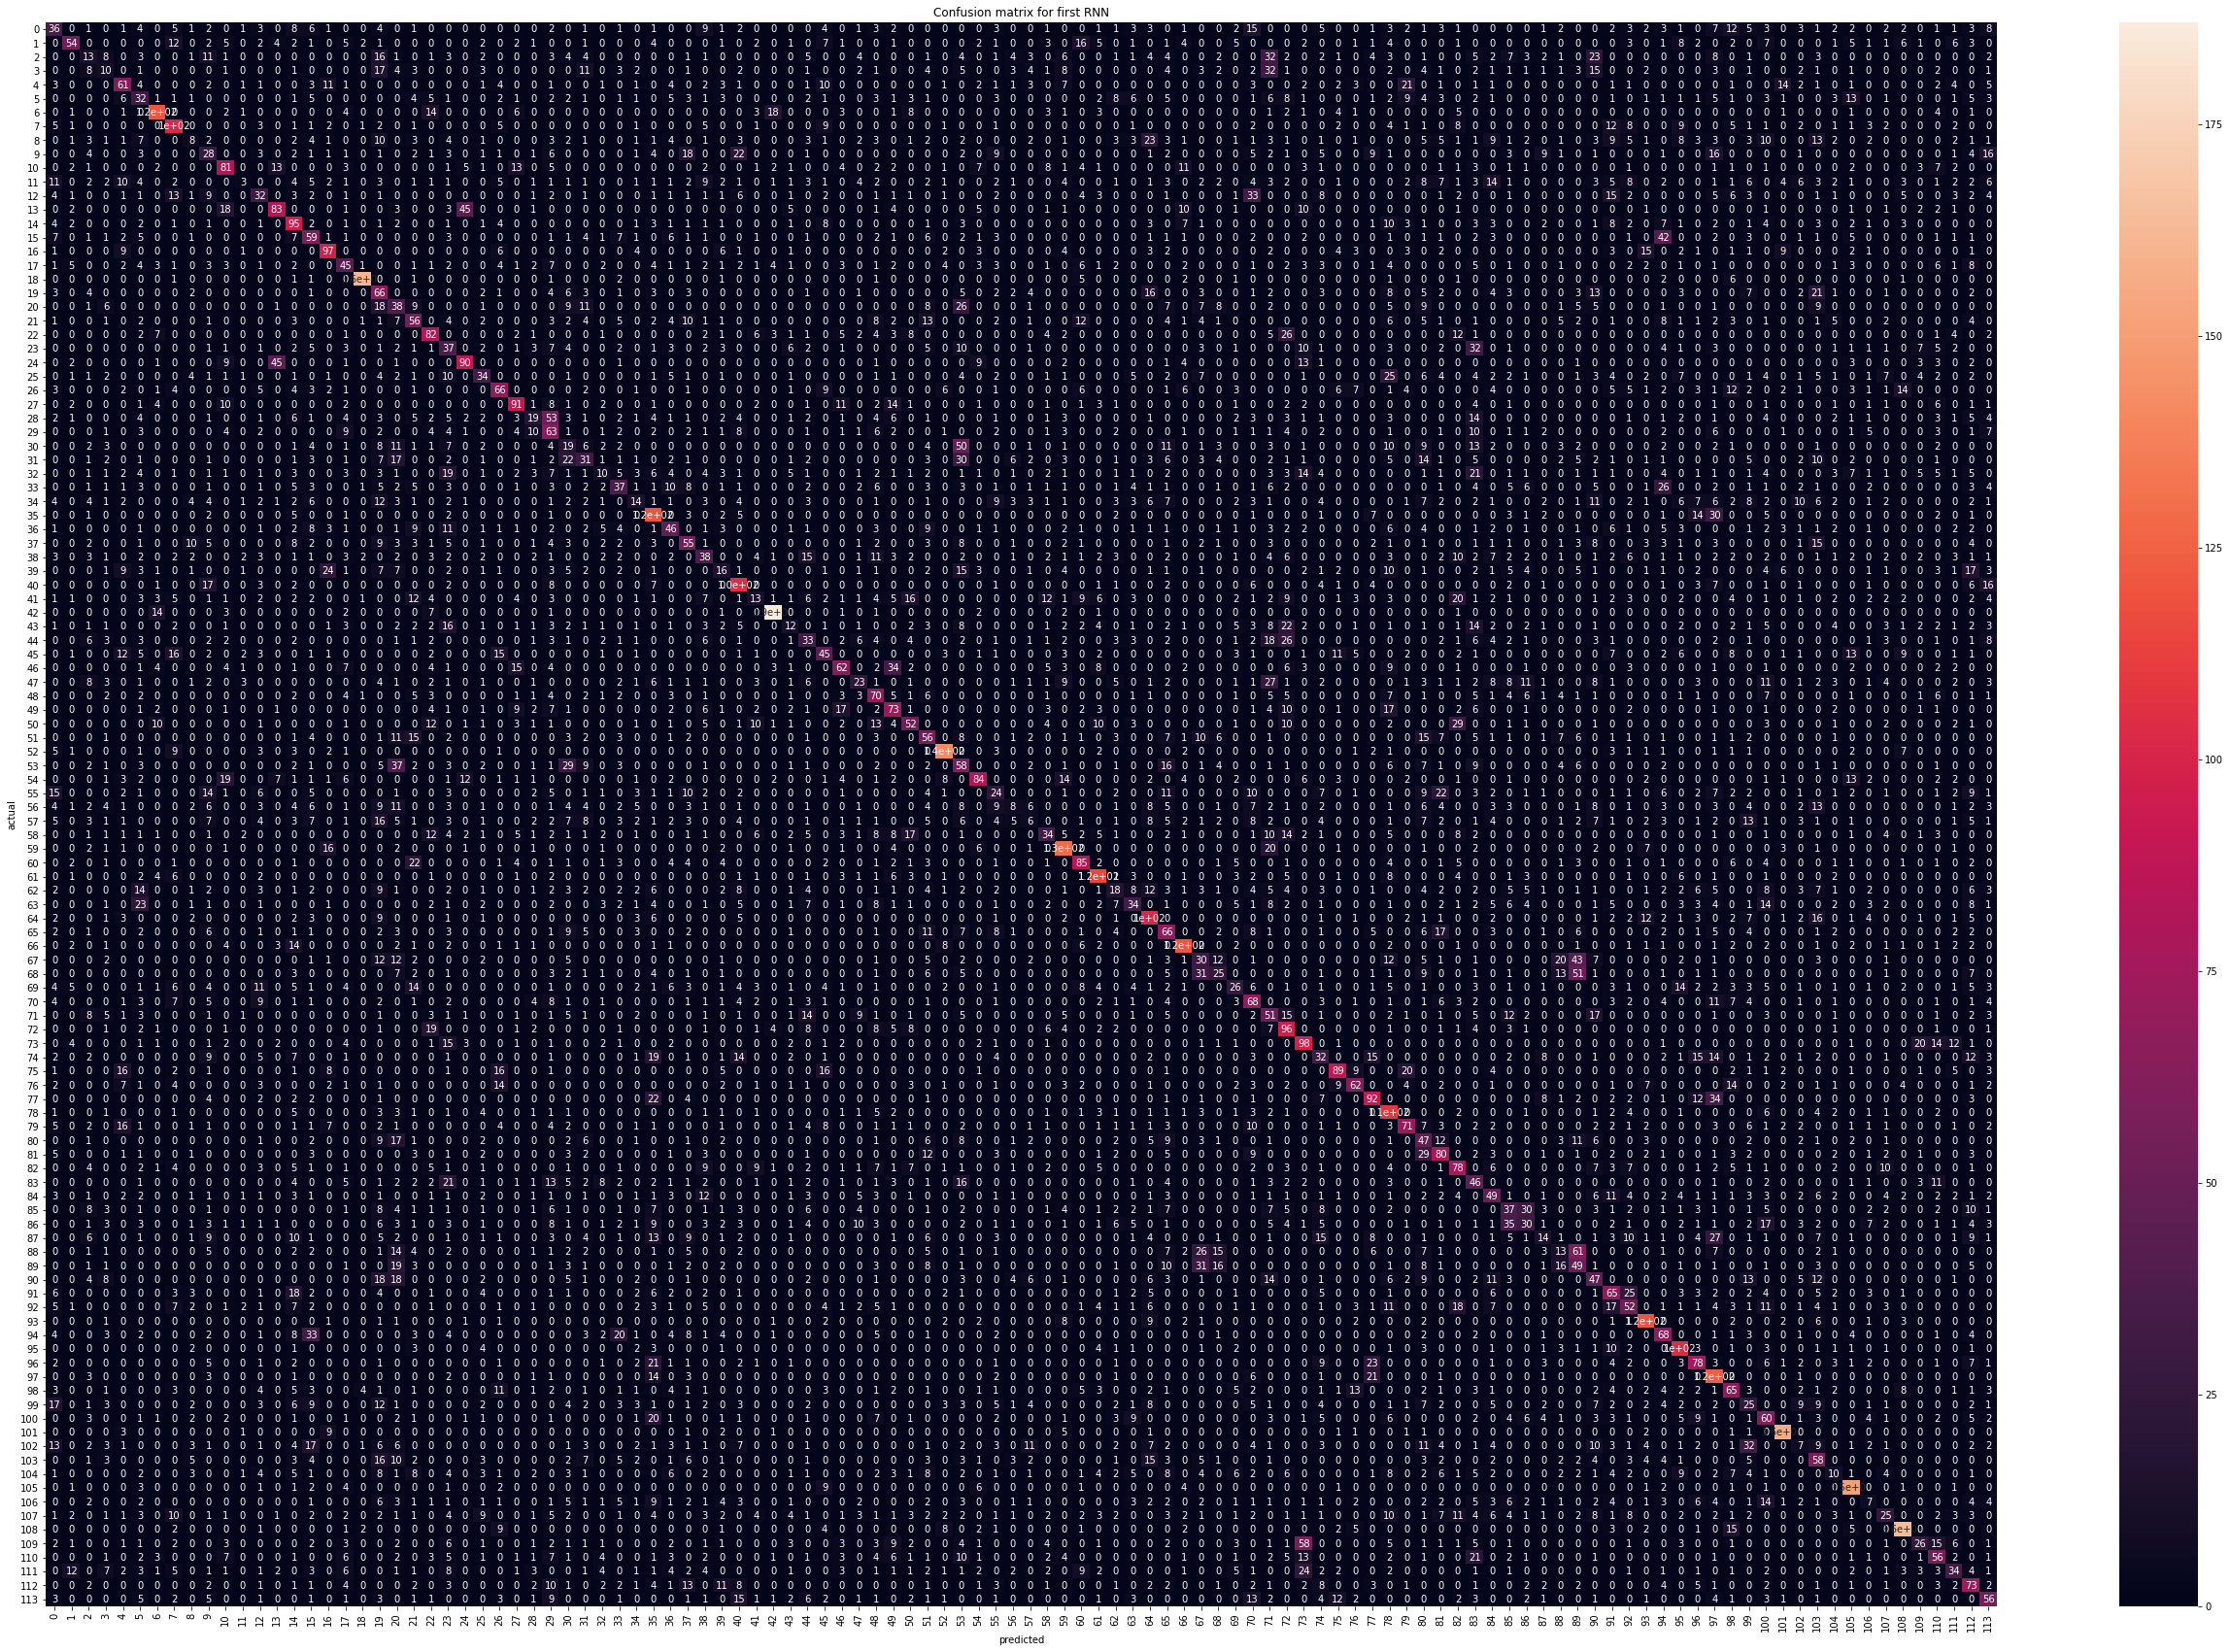

In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(45,30))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)),annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion matrix for first RNN')
plt.savefig('rnn1_conf_matrix.png')
plt.show()

In [24]:
model.save('RNN1net')

INFO:tensorflow:Assets written to: RNN1net\assets


INFO:tensorflow:Assets written to: RNN1net\assets


### 2 LSTM layers
switching the first dense layer with LSTM layer

In [25]:
model2 = keras.Sequential()
# first layer is an LSTM recursive layer
model2.add(layers.LSTM(80, return_sequences = True, input_shape=(15,1,)))
# second layer is another LSTM recursive layer
model2.add(layers.LSTM(150, return_sequences = False))
# last layer is the softmax layer for classification
model2.add(layers.Dense(114, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 15, 80)            26240     
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               138600    
_________________________________________________________________
dense_2 (Dense)              (None, 114)               17214     
Total params: 182,054
Trainable params: 182,054
Non-trainable params: 0
_________________________________________________________________


In [26]:
checkpoint_path = "rnn2_training/cp.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [27]:
# Compile and train the model.
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history2 = model2.fit(X_train,
                  y_train,
                  epochs=1000, 
                  batch_size=10000, 
                  validation_data=(X_val, y_val),
                  callbacks=[cp_callback])  # Pass callback to training

Epoch 1/1000
8/8 [==============================] - 32s 3s/step - loss: 4.7361 - accuracy: 0.0089 - val_loss: 4.7351 - val_accuracy: 0.0087

Epoch 00001: saving model to rnn2_training\cp.ckpt
Epoch 2/1000
8/8 [==============================] - 24s 3s/step - loss: 4.7336 - accuracy: 0.0089 - val_loss: 4.7305 - val_accuracy: 0.0087

Epoch 00002: saving model to rnn2_training\cp.ckpt
Epoch 3/1000
8/8 [==============================] - 24s 3s/step - loss: 4.7196 - accuracy: 0.0095 - val_loss: 4.6857 - val_accuracy: 0.0155

Epoch 00003: saving model to rnn2_training\cp.ckpt
Epoch 4/1000
8/8 [==============================] - 23s 3s/step - loss: 4.6440 - accuracy: 0.0165 - val_loss: 4.6079 - val_accuracy: 0.0162

Epoch 00004: saving model to rnn2_training\cp.ckpt
Epoch 5/1000
8/8 [==============================] - 23s 3s/step - loss: 4.5796 - accuracy: 0.0212 - val_loss: 4.5474 - val_accuracy: 0.0259

Epoch 00005: saving model to rnn2_training\cp.ckpt
Epoch 6/1000
8/8 [======================


Epoch 00043: saving model to rnn2_training\cp.ckpt
Epoch 44/1000
8/8 [==============================] - 23s 3s/step - loss: 3.4402 - accuracy: 0.1505 - val_loss: 3.4635 - val_accuracy: 0.1504

Epoch 00044: saving model to rnn2_training\cp.ckpt
Epoch 45/1000
8/8 [==============================] - 23s 3s/step - loss: 3.4411 - accuracy: 0.1505 - val_loss: 3.4512 - val_accuracy: 0.1511

Epoch 00045: saving model to rnn2_training\cp.ckpt
Epoch 46/1000
8/8 [==============================] - 24s 3s/step - loss: 3.4414 - accuracy: 0.1513 - val_loss: 3.4713 - val_accuracy: 0.1517

Epoch 00046: saving model to rnn2_training\cp.ckpt
Epoch 47/1000
8/8 [==============================] - 24s 3s/step - loss: 3.4292 - accuracy: 0.1527 - val_loss: 3.4339 - val_accuracy: 0.1562

Epoch 00047: saving model to rnn2_training\cp.ckpt
Epoch 48/1000
8/8 [==============================] - 24s 3s/step - loss: 3.4198 - accuracy: 0.1537 - val_loss: 3.4670 - val_accuracy: 0.1491

Epoch 00048: saving model to rnn2_

8/8 [==============================] - 27s 3s/step - loss: 3.3063 - accuracy: 0.1702 - val_loss: 3.3296 - val_accuracy: 0.1709

Epoch 00086: saving model to rnn2_training\cp.ckpt
Epoch 87/1000
8/8 [==============================] - 27s 3s/step - loss: 3.2973 - accuracy: 0.1722 - val_loss: 3.3412 - val_accuracy: 0.1710

Epoch 00087: saving model to rnn2_training\cp.ckpt
Epoch 88/1000
8/8 [==============================] - 25s 3s/step - loss: 3.3059 - accuracy: 0.1701 - val_loss: 3.3689 - val_accuracy: 0.1668

Epoch 00088: saving model to rnn2_training\cp.ckpt
Epoch 89/1000
8/8 [==============================] - 26s 3s/step - loss: 3.3122 - accuracy: 0.1696 - val_loss: 3.3169 - val_accuracy: 0.1730

Epoch 00089: saving model to rnn2_training\cp.ckpt
Epoch 90/1000
8/8 [==============================] - 26s 3s/step - loss: 3.2853 - accuracy: 0.1743 - val_loss: 3.3292 - val_accuracy: 0.1720

Epoch 00090: saving model to rnn2_training\cp.ckpt
Epoch 91/1000
8/8 [==============================

8/8 [==============================] - 37s 5s/step - loss: 3.2207 - accuracy: 0.1858 - val_loss: 3.3101 - val_accuracy: 0.1752

Epoch 00128: saving model to rnn2_training\cp.ckpt
Epoch 129/1000
8/8 [==============================] - 36s 5s/step - loss: 3.2421 - accuracy: 0.1808 - val_loss: 3.2703 - val_accuracy: 0.1819

Epoch 00129: saving model to rnn2_training\cp.ckpt
Epoch 130/1000
8/8 [==============================] - 36s 5s/step - loss: 3.2162 - accuracy: 0.1868 - val_loss: 3.2646 - val_accuracy: 0.1833

Epoch 00130: saving model to rnn2_training\cp.ckpt
Epoch 131/1000
8/8 [==============================] - 36s 5s/step - loss: 3.2170 - accuracy: 0.1863 - val_loss: 3.2566 - val_accuracy: 0.1841

Epoch 00131: saving model to rnn2_training\cp.ckpt
Epoch 132/1000
8/8 [==============================] - 36s 4s/step - loss: 3.2201 - accuracy: 0.1854 - val_loss: 3.2678 - val_accuracy: 0.1804

Epoch 00132: saving model to rnn2_training\cp.ckpt
Epoch 133/1000
8/8 [=========================

8/8 [==============================] - 37s 5s/step - loss: 3.1583 - accuracy: 0.1953 - val_loss: 3.2146 - val_accuracy: 0.1946

Epoch 00170: saving model to rnn2_training\cp.ckpt
Epoch 171/1000
8/8 [==============================] - 37s 5s/step - loss: 3.1531 - accuracy: 0.1959 - val_loss: 3.1986 - val_accuracy: 0.1948

Epoch 00171: saving model to rnn2_training\cp.ckpt
Epoch 172/1000
8/8 [==============================] - 37s 5s/step - loss: 3.1425 - accuracy: 0.1986 - val_loss: 3.2030 - val_accuracy: 0.1970

Epoch 00172: saving model to rnn2_training\cp.ckpt
Epoch 173/1000
8/8 [==============================] - 36s 4s/step - loss: 3.1562 - accuracy: 0.1963 - val_loss: 3.1934 - val_accuracy: 0.1983

Epoch 00173: saving model to rnn2_training\cp.ckpt
Epoch 174/1000
8/8 [==============================] - 37s 5s/step - loss: 3.1425 - accuracy: 0.1974 - val_loss: 3.2110 - val_accuracy: 0.1923

Epoch 00174: saving model to rnn2_training\cp.ckpt
Epoch 175/1000
8/8 [=========================

8/8 [==============================] - 36s 4s/step - loss: 3.0972 - accuracy: 0.2071 - val_loss: 3.1546 - val_accuracy: 0.2060

Epoch 00212: saving model to rnn2_training\cp.ckpt
Epoch 213/1000
8/8 [==============================] - 36s 5s/step - loss: 3.1077 - accuracy: 0.2054 - val_loss: 3.1568 - val_accuracy: 0.2056

Epoch 00213: saving model to rnn2_training\cp.ckpt
Epoch 214/1000
8/8 [==============================] - 36s 5s/step - loss: 3.0961 - accuracy: 0.2062 - val_loss: 3.1521 - val_accuracy: 0.2073

Epoch 00214: saving model to rnn2_training\cp.ckpt
Epoch 215/1000
8/8 [==============================] - 37s 5s/step - loss: 3.0827 - accuracy: 0.2094 - val_loss: 3.1515 - val_accuracy: 0.2054

Epoch 00215: saving model to rnn2_training\cp.ckpt
Epoch 216/1000
8/8 [==============================] - 37s 5s/step - loss: 3.0827 - accuracy: 0.2094 - val_loss: 3.1427 - val_accuracy: 0.2057

Epoch 00216: saving model to rnn2_training\cp.ckpt
Epoch 217/1000
8/8 [=========================

8/8 [==============================] - 37s 5s/step - loss: 3.0261 - accuracy: 0.2186 - val_loss: 3.0962 - val_accuracy: 0.2122

Epoch 00254: saving model to rnn2_training\cp.ckpt
Epoch 255/1000
8/8 [==============================] - 36s 5s/step - loss: 3.0331 - accuracy: 0.2187 - val_loss: 3.0934 - val_accuracy: 0.2147

Epoch 00255: saving model to rnn2_training\cp.ckpt
Epoch 256/1000
8/8 [==============================] - 37s 5s/step - loss: 3.0358 - accuracy: 0.2165 - val_loss: 3.1067 - val_accuracy: 0.2092

Epoch 00256: saving model to rnn2_training\cp.ckpt
Epoch 257/1000
8/8 [==============================] - 36s 5s/step - loss: 3.0245 - accuracy: 0.2195 - val_loss: 3.1031 - val_accuracy: 0.2104

Epoch 00257: saving model to rnn2_training\cp.ckpt
Epoch 258/1000
8/8 [==============================] - 36s 4s/step - loss: 3.0228 - accuracy: 0.2184 - val_loss: 3.1034 - val_accuracy: 0.2113

Epoch 00258: saving model to rnn2_training\cp.ckpt
Epoch 259/1000
8/8 [=========================

8/8 [==============================] - 37s 5s/step - loss: 2.9786 - accuracy: 0.2269 - val_loss: 3.0581 - val_accuracy: 0.2187

Epoch 00296: saving model to rnn2_training\cp.ckpt
Epoch 297/1000
8/8 [==============================] - 36s 5s/step - loss: 2.9852 - accuracy: 0.2252 - val_loss: 3.0747 - val_accuracy: 0.2137

Epoch 00297: saving model to rnn2_training\cp.ckpt
Epoch 298/1000
8/8 [==============================] - 37s 5s/step - loss: 2.9796 - accuracy: 0.2257 - val_loss: 3.0722 - val_accuracy: 0.2171

Epoch 00298: saving model to rnn2_training\cp.ckpt
Epoch 299/1000
8/8 [==============================] - 36s 5s/step - loss: 2.9882 - accuracy: 0.2242 - val_loss: 3.0729 - val_accuracy: 0.2162

Epoch 00299: saving model to rnn2_training\cp.ckpt
Epoch 300/1000
8/8 [==============================] - 36s 4s/step - loss: 2.9802 - accuracy: 0.2266 - val_loss: 3.0575 - val_accuracy: 0.2185

Epoch 00300: saving model to rnn2_training\cp.ckpt
Epoch 301/1000
8/8 [=========================

8/8 [==============================] - 36s 5s/step - loss: 2.9472 - accuracy: 0.2316 - val_loss: 3.0397 - val_accuracy: 0.2233

Epoch 00338: saving model to rnn2_training\cp.ckpt
Epoch 339/1000
8/8 [==============================] - 36s 4s/step - loss: 2.9318 - accuracy: 0.2353 - val_loss: 3.0279 - val_accuracy: 0.2236

Epoch 00339: saving model to rnn2_training\cp.ckpt
Epoch 340/1000
8/8 [==============================] - 36s 5s/step - loss: 2.9281 - accuracy: 0.2351 - val_loss: 3.0317 - val_accuracy: 0.2261

Epoch 00340: saving model to rnn2_training\cp.ckpt
Epoch 341/1000
8/8 [==============================] - 36s 5s/step - loss: 2.9306 - accuracy: 0.2347 - val_loss: 3.0380 - val_accuracy: 0.2229

Epoch 00341: saving model to rnn2_training\cp.ckpt
Epoch 342/1000
8/8 [==============================] - 37s 5s/step - loss: 2.9339 - accuracy: 0.2348 - val_loss: 3.0257 - val_accuracy: 0.2241

Epoch 00342: saving model to rnn2_training\cp.ckpt
Epoch 343/1000
8/8 [=========================

8/8 [==============================] - 37s 5s/step - loss: 2.8996 - accuracy: 0.2411 - val_loss: 3.0095 - val_accuracy: 0.2274

Epoch 00380: saving model to rnn2_training\cp.ckpt
Epoch 381/1000
8/8 [==============================] - 38s 5s/step - loss: 2.8998 - accuracy: 0.2415 - val_loss: 3.0225 - val_accuracy: 0.2262

Epoch 00381: saving model to rnn2_training\cp.ckpt
Epoch 382/1000
8/8 [==============================] - 36s 5s/step - loss: 2.9049 - accuracy: 0.2409 - val_loss: 3.0234 - val_accuracy: 0.2252

Epoch 00382: saving model to rnn2_training\cp.ckpt
Epoch 383/1000
8/8 [==============================] - 37s 5s/step - loss: 2.8999 - accuracy: 0.2424 - val_loss: 3.0148 - val_accuracy: 0.2251

Epoch 00383: saving model to rnn2_training\cp.ckpt
Epoch 384/1000
8/8 [==============================] - 36s 5s/step - loss: 2.9043 - accuracy: 0.2401 - val_loss: 3.0739 - val_accuracy: 0.2163

Epoch 00384: saving model to rnn2_training\cp.ckpt
Epoch 385/1000
8/8 [=========================

8/8 [==============================] - 48s 6s/step - loss: 2.9003 - accuracy: 0.2424 - val_loss: 2.9996 - val_accuracy: 0.2297

Epoch 00422: saving model to rnn2_training\cp.ckpt
Epoch 423/1000
8/8 [==============================] - 46s 6s/step - loss: 2.8860 - accuracy: 0.2452 - val_loss: 2.9914 - val_accuracy: 0.2305

Epoch 00423: saving model to rnn2_training\cp.ckpt
Epoch 424/1000
8/8 [==============================] - 46s 6s/step - loss: 2.8741 - accuracy: 0.2462 - val_loss: 2.9893 - val_accuracy: 0.2301

Epoch 00424: saving model to rnn2_training\cp.ckpt
Epoch 425/1000
8/8 [==============================] - 44s 6s/step - loss: 2.8646 - accuracy: 0.2480 - val_loss: 2.9867 - val_accuracy: 0.2288

Epoch 00425: saving model to rnn2_training\cp.ckpt
Epoch 426/1000
8/8 [==============================] - 40s 5s/step - loss: 2.8660 - accuracy: 0.2472 - val_loss: 2.9968 - val_accuracy: 0.2282

Epoch 00426: saving model to rnn2_training\cp.ckpt
Epoch 427/1000
8/8 [=========================

8/8 [==============================] - 42s 5s/step - loss: 2.8376 - accuracy: 0.2526 - val_loss: 2.9710 - val_accuracy: 0.2313

Epoch 00464: saving model to rnn2_training\cp.ckpt
Epoch 465/1000
8/8 [==============================] - 42s 5s/step - loss: 2.8390 - accuracy: 0.2521 - val_loss: 2.9742 - val_accuracy: 0.2325

Epoch 00465: saving model to rnn2_training\cp.ckpt
Epoch 466/1000
8/8 [==============================] - 42s 5s/step - loss: 2.8391 - accuracy: 0.2537 - val_loss: 2.9730 - val_accuracy: 0.2321

Epoch 00466: saving model to rnn2_training\cp.ckpt
Epoch 467/1000
8/8 [==============================] - 41s 5s/step - loss: 2.8402 - accuracy: 0.2528 - val_loss: 2.9701 - val_accuracy: 0.2326

Epoch 00467: saving model to rnn2_training\cp.ckpt
Epoch 468/1000
8/8 [==============================] - 41s 5s/step - loss: 2.8347 - accuracy: 0.2543 - val_loss: 2.9688 - val_accuracy: 0.2312

Epoch 00468: saving model to rnn2_training\cp.ckpt
Epoch 469/1000
8/8 [=========================

8/8 [==============================] - 51s 6s/step - loss: 2.8218 - accuracy: 0.2559 - val_loss: 2.9696 - val_accuracy: 0.2333

Epoch 00506: saving model to rnn2_training\cp.ckpt
Epoch 507/1000
8/8 [==============================] - 51s 6s/step - loss: 2.8171 - accuracy: 0.2576 - val_loss: 2.9789 - val_accuracy: 0.2311

Epoch 00507: saving model to rnn2_training\cp.ckpt
Epoch 508/1000
8/8 [==============================] - 51s 6s/step - loss: 2.8236 - accuracy: 0.2563 - val_loss: 2.9535 - val_accuracy: 0.2330

Epoch 00508: saving model to rnn2_training\cp.ckpt
Epoch 509/1000
8/8 [==============================] - 49s 6s/step - loss: 2.8066 - accuracy: 0.2588 - val_loss: 2.9556 - val_accuracy: 0.2359

Epoch 00509: saving model to rnn2_training\cp.ckpt
Epoch 510/1000
8/8 [==============================] - 49s 6s/step - loss: 2.8032 - accuracy: 0.2597 - val_loss: 2.9491 - val_accuracy: 0.2376

Epoch 00510: saving model to rnn2_training\cp.ckpt
Epoch 511/1000
8/8 [=========================

8/8 [==============================] - 40s 5s/step - loss: 2.8006 - accuracy: 0.2604 - val_loss: 2.9431 - val_accuracy: 0.2354

Epoch 00548: saving model to rnn2_training\cp.ckpt
Epoch 549/1000
8/8 [==============================] - 43s 6s/step - loss: 2.7943 - accuracy: 0.2619 - val_loss: 2.9474 - val_accuracy: 0.2365

Epoch 00549: saving model to rnn2_training\cp.ckpt
Epoch 550/1000
8/8 [==============================] - 48s 6s/step - loss: 2.7857 - accuracy: 0.2619 - val_loss: 2.9483 - val_accuracy: 0.2364

Epoch 00550: saving model to rnn2_training\cp.ckpt
Epoch 551/1000
8/8 [==============================] - 48s 6s/step - loss: 2.7926 - accuracy: 0.2605 - val_loss: 2.9473 - val_accuracy: 0.2358

Epoch 00551: saving model to rnn2_training\cp.ckpt
Epoch 552/1000
8/8 [==============================] - 47s 6s/step - loss: 2.8010 - accuracy: 0.2598 - val_loss: 2.9380 - val_accuracy: 0.2391

Epoch 00552: saving model to rnn2_training\cp.ckpt
Epoch 553/1000
8/8 [=========================

8/8 [==============================] - 36s 5s/step - loss: 2.7781 - accuracy: 0.2635 - val_loss: 2.9343 - val_accuracy: 0.2390

Epoch 00590: saving model to rnn2_training\cp.ckpt
Epoch 591/1000
8/8 [==============================] - 36s 5s/step - loss: 2.7600 - accuracy: 0.2696 - val_loss: 2.9295 - val_accuracy: 0.2400

Epoch 00591: saving model to rnn2_training\cp.ckpt
Epoch 592/1000
8/8 [==============================] - 35s 4s/step - loss: 2.7752 - accuracy: 0.2648 - val_loss: 2.9216 - val_accuracy: 0.2405

Epoch 00592: saving model to rnn2_training\cp.ckpt
Epoch 593/1000
8/8 [==============================] - 38s 5s/step - loss: 2.7558 - accuracy: 0.2686 - val_loss: 2.9354 - val_accuracy: 0.2405

Epoch 00593: saving model to rnn2_training\cp.ckpt
Epoch 594/1000
8/8 [==============================] - 36s 4s/step - loss: 2.7623 - accuracy: 0.2669 - val_loss: 2.9325 - val_accuracy: 0.2367

Epoch 00594: saving model to rnn2_training\cp.ckpt
Epoch 595/1000
8/8 [=========================

8/8 [==============================] - 34s 4s/step - loss: 2.7676 - accuracy: 0.2659 - val_loss: 2.9324 - val_accuracy: 0.2377

Epoch 00632: saving model to rnn2_training\cp.ckpt
Epoch 633/1000
8/8 [==============================] - 34s 4s/step - loss: 2.7492 - accuracy: 0.2691 - val_loss: 2.9408 - val_accuracy: 0.2373

Epoch 00633: saving model to rnn2_training\cp.ckpt
Epoch 634/1000
8/8 [==============================] - 34s 4s/step - loss: 2.7498 - accuracy: 0.2689 - val_loss: 2.9130 - val_accuracy: 0.2395

Epoch 00634: saving model to rnn2_training\cp.ckpt
Epoch 635/1000
8/8 [==============================] - 35s 4s/step - loss: 2.7376 - accuracy: 0.2730 - val_loss: 2.9178 - val_accuracy: 0.2420

Epoch 00635: saving model to rnn2_training\cp.ckpt
Epoch 636/1000
8/8 [==============================] - 34s 4s/step - loss: 2.7402 - accuracy: 0.2711 - val_loss: 2.9106 - val_accuracy: 0.2438

Epoch 00636: saving model to rnn2_training\cp.ckpt
Epoch 637/1000
8/8 [=========================

8/8 [==============================] - 35s 4s/step - loss: 2.7363 - accuracy: 0.2716 - val_loss: 2.9713 - val_accuracy: 0.2339

Epoch 00674: saving model to rnn2_training\cp.ckpt
Epoch 675/1000
8/8 [==============================] - 34s 4s/step - loss: 2.7495 - accuracy: 0.2682 - val_loss: 2.9641 - val_accuracy: 0.2335

Epoch 00675: saving model to rnn2_training\cp.ckpt
Epoch 676/1000
8/8 [==============================] - 34s 4s/step - loss: 2.7412 - accuracy: 0.2709 - val_loss: 2.9285 - val_accuracy: 0.2410

Epoch 00676: saving model to rnn2_training\cp.ckpt
Epoch 677/1000
8/8 [==============================] - 34s 4s/step - loss: 2.7298 - accuracy: 0.2731 - val_loss: 2.9239 - val_accuracy: 0.2420

Epoch 00677: saving model to rnn2_training\cp.ckpt
Epoch 678/1000
8/8 [==============================] - 34s 4s/step - loss: 2.7309 - accuracy: 0.2726 - val_loss: 2.8960 - val_accuracy: 0.2469

Epoch 00678: saving model to rnn2_training\cp.ckpt
Epoch 679/1000
8/8 [=========================

8/8 [==============================] - 38s 5s/step - loss: 2.6874 - accuracy: 0.2812 - val_loss: 2.9006 - val_accuracy: 0.2476

Epoch 00716: saving model to rnn2_training\cp.ckpt
Epoch 717/1000
8/8 [==============================] - 37s 5s/step - loss: 2.7323 - accuracy: 0.2724 - val_loss: 2.9487 - val_accuracy: 0.2367

Epoch 00717: saving model to rnn2_training\cp.ckpt
Epoch 718/1000
8/8 [==============================] - 38s 5s/step - loss: 2.7415 - accuracy: 0.2694 - val_loss: 2.8946 - val_accuracy: 0.2468

Epoch 00718: saving model to rnn2_training\cp.ckpt
Epoch 719/1000
8/8 [==============================] - 36s 5s/step - loss: 2.7143 - accuracy: 0.2747 - val_loss: 2.9176 - val_accuracy: 0.2439

Epoch 00719: saving model to rnn2_training\cp.ckpt
Epoch 720/1000
8/8 [==============================] - 37s 5s/step - loss: 2.7098 - accuracy: 0.2756 - val_loss: 2.9073 - val_accuracy: 0.2430

Epoch 00720: saving model to rnn2_training\cp.ckpt
Epoch 721/1000
8/8 [=========================

8/8 [==============================] - 23s 3s/step - loss: 2.6705 - accuracy: 0.2844 - val_loss: 2.8891 - val_accuracy: 0.2487

Epoch 00758: saving model to rnn2_training\cp.ckpt
Epoch 759/1000
8/8 [==============================] - 23s 3s/step - loss: 2.6648 - accuracy: 0.2858 - val_loss: 2.8871 - val_accuracy: 0.2492

Epoch 00759: saving model to rnn2_training\cp.ckpt
Epoch 760/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6745 - accuracy: 0.2836 - val_loss: 2.8720 - val_accuracy: 0.2522

Epoch 00760: saving model to rnn2_training\cp.ckpt
Epoch 761/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6583 - accuracy: 0.2886 - val_loss: 2.8672 - val_accuracy: 0.2540

Epoch 00761: saving model to rnn2_training\cp.ckpt
Epoch 762/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6564 - accuracy: 0.2880 - val_loss: 2.8712 - val_accuracy: 0.2515

Epoch 00762: saving model to rnn2_training\cp.ckpt
Epoch 763/1000
8/8 [=========================

8/8 [==============================] - 22s 3s/step - loss: 2.6435 - accuracy: 0.2911 - val_loss: 2.8628 - val_accuracy: 0.2536

Epoch 00800: saving model to rnn2_training\cp.ckpt
Epoch 801/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6351 - accuracy: 0.2925 - val_loss: 2.8642 - val_accuracy: 0.2562

Epoch 00801: saving model to rnn2_training\cp.ckpt
Epoch 802/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6424 - accuracy: 0.2900 - val_loss: 2.8665 - val_accuracy: 0.2543

Epoch 00802: saving model to rnn2_training\cp.ckpt
Epoch 803/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6611 - accuracy: 0.2863 - val_loss: 2.8846 - val_accuracy: 0.2516

Epoch 00803: saving model to rnn2_training\cp.ckpt
Epoch 804/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6484 - accuracy: 0.2901 - val_loss: 2.8610 - val_accuracy: 0.2528

Epoch 00804: saving model to rnn2_training\cp.ckpt
Epoch 805/1000
8/8 [=========================

8/8 [==============================] - 23s 3s/step - loss: 2.6379 - accuracy: 0.2919 - val_loss: 2.8620 - val_accuracy: 0.2532

Epoch 00842: saving model to rnn2_training\cp.ckpt
Epoch 843/1000
8/8 [==============================] - 23s 3s/step - loss: 2.6213 - accuracy: 0.2948 - val_loss: 2.8637 - val_accuracy: 0.2532

Epoch 00843: saving model to rnn2_training\cp.ckpt
Epoch 844/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6221 - accuracy: 0.2960 - val_loss: 2.8585 - val_accuracy: 0.2558

Epoch 00844: saving model to rnn2_training\cp.ckpt
Epoch 845/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6316 - accuracy: 0.2927 - val_loss: 2.8548 - val_accuracy: 0.2558

Epoch 00845: saving model to rnn2_training\cp.ckpt
Epoch 846/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6217 - accuracy: 0.2959 - val_loss: 2.8842 - val_accuracy: 0.2499

Epoch 00846: saving model to rnn2_training\cp.ckpt
Epoch 847/1000
8/8 [=========================

8/8 [==============================] - 22s 3s/step - loss: 2.6120 - accuracy: 0.2963 - val_loss: 2.8494 - val_accuracy: 0.2568

Epoch 00884: saving model to rnn2_training\cp.ckpt
Epoch 885/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6012 - accuracy: 0.3000 - val_loss: 2.8426 - val_accuracy: 0.2567

Epoch 00885: saving model to rnn2_training\cp.ckpt
Epoch 886/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6114 - accuracy: 0.2966 - val_loss: 2.8591 - val_accuracy: 0.2557

Epoch 00886: saving model to rnn2_training\cp.ckpt
Epoch 887/1000
8/8 [==============================] - 22s 3s/step - loss: 2.6211 - accuracy: 0.2950 - val_loss: 2.8752 - val_accuracy: 0.2523

Epoch 00887: saving model to rnn2_training\cp.ckpt
Epoch 888/1000
8/8 [==============================] - 23s 3s/step - loss: 2.6145 - accuracy: 0.2967 - val_loss: 2.8538 - val_accuracy: 0.2540

Epoch 00888: saving model to rnn2_training\cp.ckpt
Epoch 889/1000
8/8 [=========================

8/8 [==============================] - 22s 3s/step - loss: 2.5722 - accuracy: 0.3062 - val_loss: 2.8339 - val_accuracy: 0.2602

Epoch 00926: saving model to rnn2_training\cp.ckpt
Epoch 927/1000
8/8 [==============================] - 22s 3s/step - loss: 2.5692 - accuracy: 0.3072 - val_loss: 2.8314 - val_accuracy: 0.2597

Epoch 00927: saving model to rnn2_training\cp.ckpt
Epoch 928/1000
8/8 [==============================] - 22s 3s/step - loss: 2.5797 - accuracy: 0.3032 - val_loss: 2.8526 - val_accuracy: 0.2551

Epoch 00928: saving model to rnn2_training\cp.ckpt
Epoch 929/1000
8/8 [==============================] - 22s 3s/step - loss: 2.5758 - accuracy: 0.3047 - val_loss: 2.8319 - val_accuracy: 0.2602

Epoch 00929: saving model to rnn2_training\cp.ckpt
Epoch 930/1000
8/8 [==============================] - 22s 3s/step - loss: 2.5871 - accuracy: 0.3006 - val_loss: 2.8338 - val_accuracy: 0.2610

Epoch 00930: saving model to rnn2_training\cp.ckpt
Epoch 931/1000
8/8 [=========================

8/8 [==============================] - 22s 3s/step - loss: 2.5536 - accuracy: 0.3087 - val_loss: 2.8409 - val_accuracy: 0.2570

Epoch 00968: saving model to rnn2_training\cp.ckpt
Epoch 969/1000
8/8 [==============================] - 22s 3s/step - loss: 2.5583 - accuracy: 0.3084 - val_loss: 2.8400 - val_accuracy: 0.2610

Epoch 00969: saving model to rnn2_training\cp.ckpt
Epoch 970/1000
8/8 [==============================] - 22s 3s/step - loss: 2.5645 - accuracy: 0.3073 - val_loss: 2.8262 - val_accuracy: 0.2614

Epoch 00970: saving model to rnn2_training\cp.ckpt
Epoch 971/1000
8/8 [==============================] - 22s 3s/step - loss: 2.5469 - accuracy: 0.3114 - val_loss: 2.8561 - val_accuracy: 0.2558

Epoch 00971: saving model to rnn2_training\cp.ckpt
Epoch 972/1000
8/8 [==============================] - 22s 3s/step - loss: 2.5649 - accuracy: 0.3070 - val_loss: 2.8275 - val_accuracy: 0.2619

Epoch 00972: saving model to rnn2_training\cp.ckpt
Epoch 973/1000
8/8 [=========================

plot learning curves

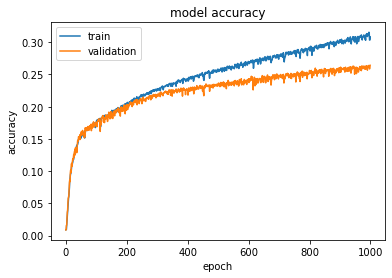

In [28]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

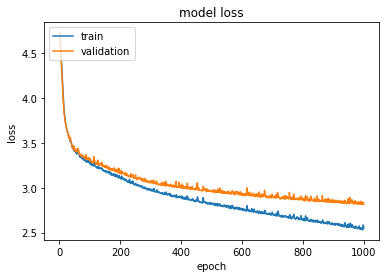

In [29]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_accuracy)

710/710 [==============================] - 5s 7ms/step - loss: 2.8348 - accuracy: 0.2583
test loss: 2.8347980976104736
test accuracy: 0.2583443522453308


In [31]:
#predictions
y_pred2 = model2.predict(X_test)

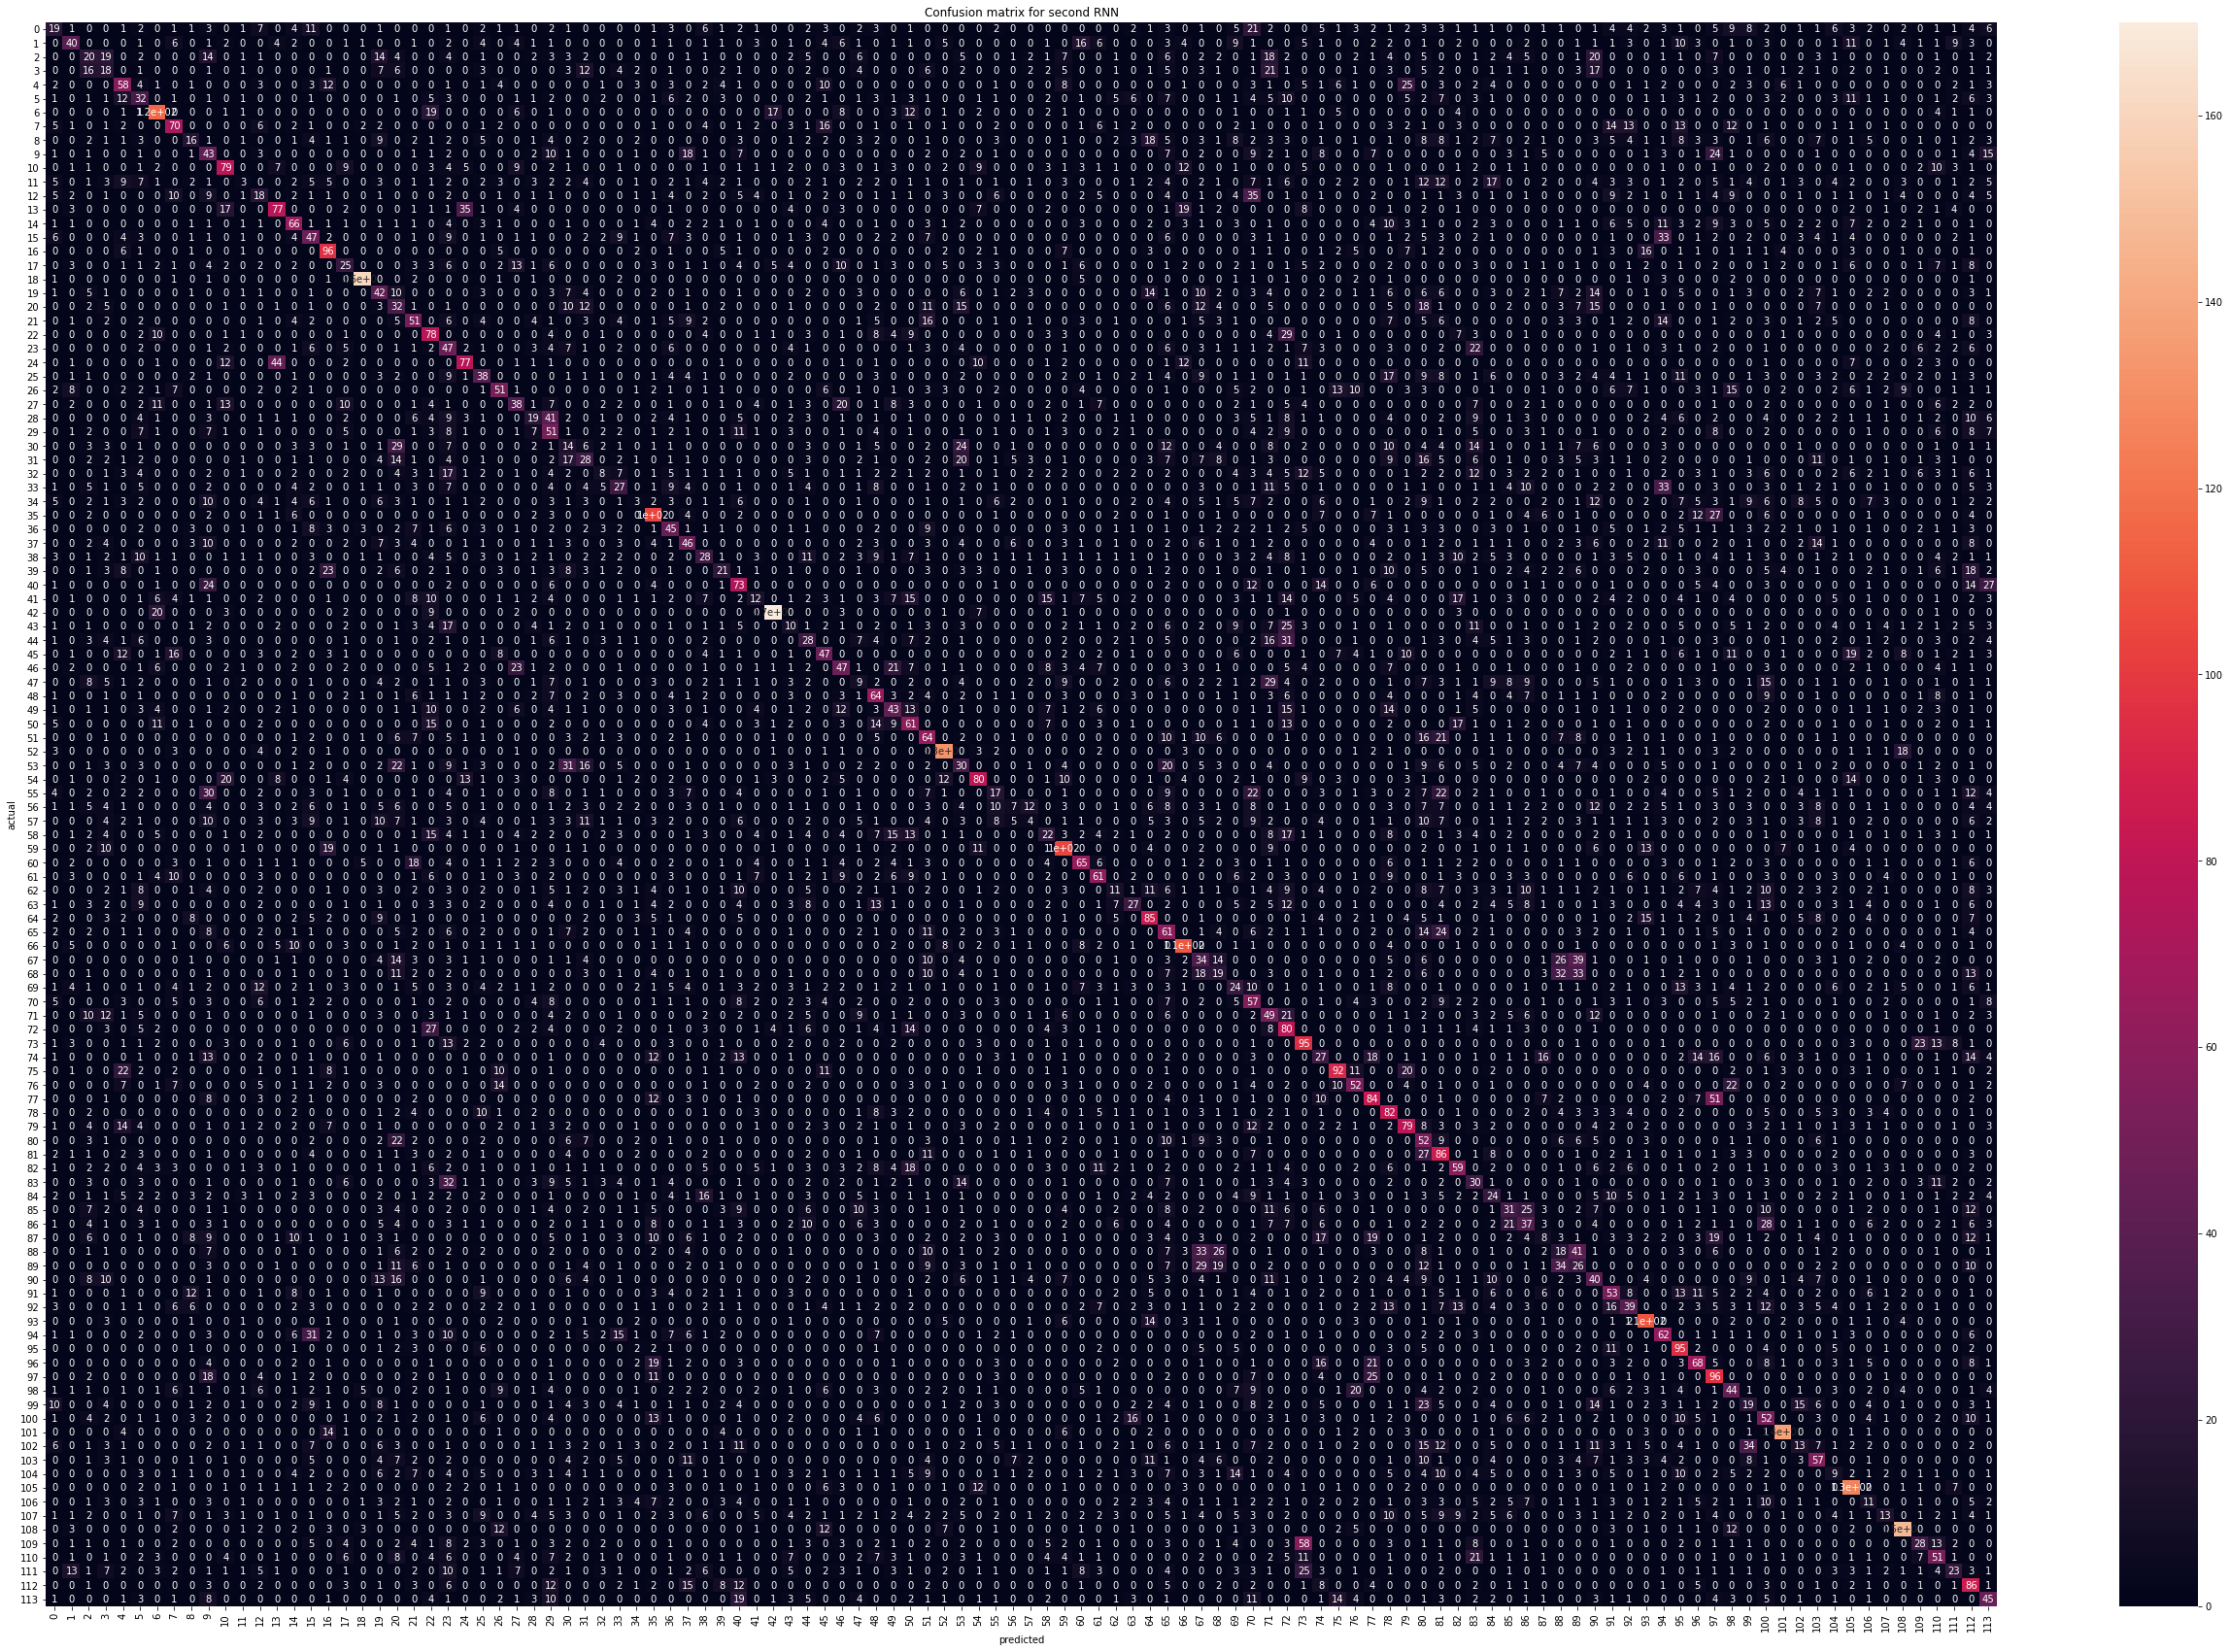

In [32]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(45,30))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1)),annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion matrix for second RNN')
plt.savefig('rnn2_conf_matrix.png')
plt.show()

In [33]:
model2.save('RNN2net')

INFO:tensorflow:Assets written to: RNN2net\assets


INFO:tensorflow:Assets written to: RNN2net\assets
